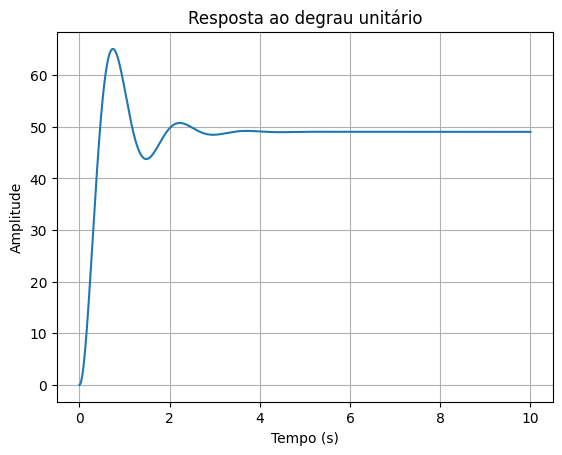

Ess → 0.020408209079653034


,Valor
Parâmetro,
RiseTime,0.27822
SettlingTime,2.50402
SettlingMin,43.73606
SettlingMax,65.06005
Overshoot,32.77591
Undershoot,0.00000
Peak,65.06005
PeakTime,0.74193
SteadyStateValue,48.99989


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control

# parâmetros calculados
zeta = 0.3346
wn = 4.4971
k_1 = 1.3885
k_2 = 35.2898


# definindo a função transferência através de parâmetros
num = [k_2*k_1*wn**2]
den = [1, 2*zeta*wn, wn**2]

# # definindo a função transferência diretamente
# num = [k*0.1]
# den = [1, 1.5, 0.5]

G = control.tf(num, den)

# construção do vetor de tempo
t = np.linspace(0, 10, 1000)
y_simulado, t_simulado = control.step_response(G,t)

# configurações de plot
plt.plot(y_simulado,t_simulado)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta ao degrau unitário')
plt.grid()
plt.show()


# Obter informações de desempenho
info = control.step_info(G)

# Criar um DataFrame a partir do dicionário com as informações de desempenho
df_simulacao = pd.DataFrame.from_dict(info, orient='index', columns=['Valor'])
df_simulacao.index.name = 'Parâmetro'

# Formatar os valores como números com duas casas decimais
df_simulacao_formatada = df_simulacao.applymap(lambda x: f'{x:.5f}')

print(f"Ess → {1/float(df_simulacao_formatada.at['SteadyStateValue', 'Valor'])}")

df_simulacao_formatada



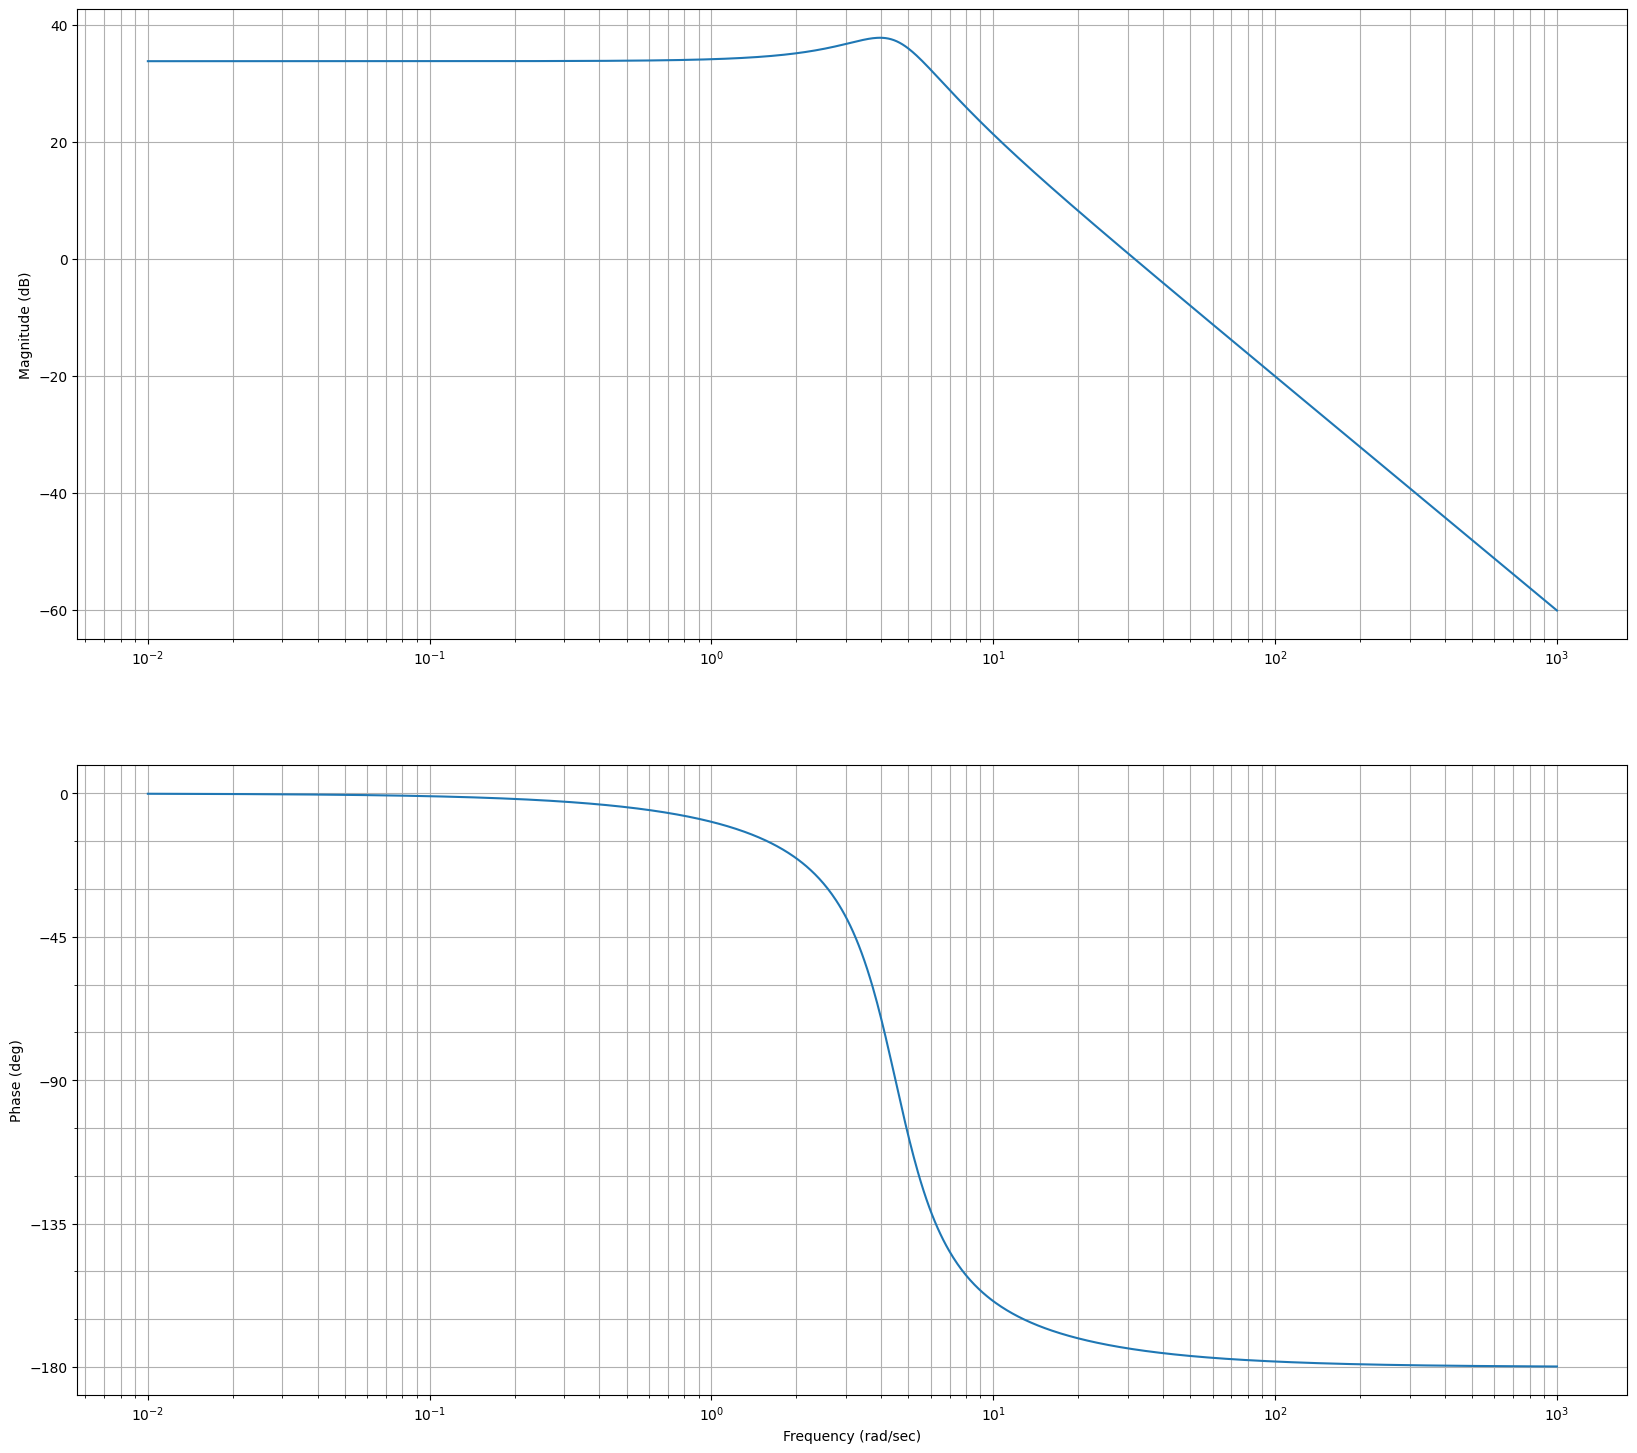

→ Informações obtidas numéricamente:


,Margem de Ganho (dB),Margem de Fase (graus),Frequência de Crossover (ω/seg),Frequência de Fase Zero (ω/seg)
0,inf,5.529042,NaN,31.726687


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import control
import pandas as pd

# parâmetros calculados
zeta = 0.3346
wn = 4.4971
k_1 = 1.3885
k_2 = 35.2898


# definindo a função transferência através de parâmetros
num = [k_2*k_1*wn**2]
den = [1, 2*zeta*wn, wn**2]

sys = control.TransferFunction(num, den)  # Criação do sistema

# Criar uma nova figura com tamanho personalizado
fig, ax = plt.subplots(figsize=(20, 18))

# Obter os dados do diagrama de Bode
mag, phase, omega = control.bode(sys, dB=True, Hz=False, omega_limits=(1e-2, 1e3))

# Plotar o gráfico manualmente usando o objeto ax
ax.semilogx(omega, mag)
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('Diagrama de Bode')


plt.show()

print("→ Informações obtidas numéricamente:")

# Cálculo das margens de fase e ganho
gm, pm, wgc, wpc = control.margin(sys)

# Imprimir as informações em um dataframe
data = {'Margem de Ganho (dB)': [20 * np.log10(gm)],
        'Margem de Fase (graus)': [pm],
        'Frequência de Crossover (\u03C9/seg)': [wgc],
        'Frequência de Fase Zero (\u03C9/seg)': [wpc]}

df = pd.DataFrame(data)
df
